In [168]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten

In [14]:
rank_0_tensor = tf.constant(4)
rank_1_tensor = tf.constant([1,2,5,6,7])
rank_2_tensor = tf.constant([[1,2],[4,5]],dtype=tf.int32)
rank_3_tensor = tf.constant([[[1,2],
                              [2,3]],
                             [[4,7],
                              [9,0]]])


In [19]:
#tensor to np array

print(np.array(rank_0_tensor))
print(np.array(rank_1_tensor))
print(np.array(rank_2_tensor))
rank_3_tensor.numpy()

4
[ 1  2  5 67]
[[1 2]
 [4 5]]


array([[[1, 2],
        [2, 3]],

       [[4, 7],
        [9, 0]]], dtype=int32)

In [29]:
#tensor operation
print(rank_0_tensor + rank_3_tensor)
print(rank_2_tensor - rank_3_tensor)
print(rank_3_tensor * rank_2_tensor)#element wise mul
print(rank_3_tensor @ rank_2_tensor)#matrix mul


print(tf.reduce_max(rank_3_tensor))#get max val
print(tf.math.argmax(rank_2_tensor))#get indoex of max el

c = tf.constant([[1.,3.5],[6.7,9.0]])
print(tf.nn.softmax(c))#softmax function computation for float val only


tf.Tensor(
[[[ 5  6]
  [ 6  7]]

 [[ 8 11]
  [13  4]]], shape=(2, 2, 2), dtype=int32)
tf.Tensor(
[[[ 0  0]
  [ 2  2]]

 [[-3 -5]
  [-5  5]]], shape=(2, 2, 2), dtype=int32)
tf.Tensor(
[[[ 1  4]
  [ 8 15]]

 [[ 4 14]
  [36  0]]], shape=(2, 2, 2), dtype=int32)
tf.Tensor(
[[[ 9 12]
  [14 19]]

 [[32 43]
  [ 9 18]]], shape=(2, 2, 2), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor([1 1], shape=(2,), dtype=int64)
tf.Tensor(
[[0.07585818 0.9241418 ]
 [0.09112295 0.9088771 ]], shape=(2, 2), dtype=float32)


In [33]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])#rank 4 tensor i.e 4 dimensional
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())



Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


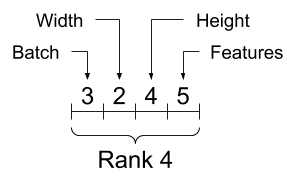
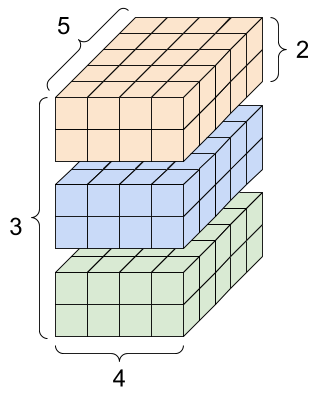
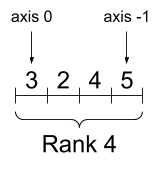

In [38]:
x = tf.constant([[1], [2], [3]])
print(x.shape)
print(x.shape.as_list())
reshaped = tf.reshape(x, [1, 3])
print(x.shape)
print(reshaped.shape)


(3, 1)
[3, 1]
(3, 1)
(1, 3)


In [40]:
string_tensor = tf.constant("Gray wolf")#string tensor
print(string_tensor)


tf.Tensor(b'Gray wolf', shape=(), dtype=string)


#**Basic Neural net for image classification**

In [47]:

fashion_data = tf.keras.datasets.fashion_mnist

(train_data,train_labels),(test_data,test_labels) = fashion_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [54]:
#print(train_data)
#print(train_labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_data.shape);print(train_labels.shape)

(60000, 28, 28)
(60000,)


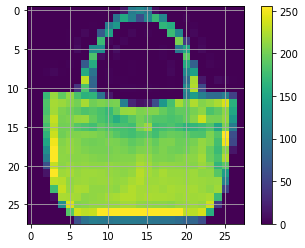

In [62]:
plt.figure()
plt.imshow(train_data[100])
plt.colorbar()
plt.grid()
plt.show()

In [63]:
#data preprocessing by scaling them from 0 to 1
train_data= train_data/255.0
test_data=test_data/255.0

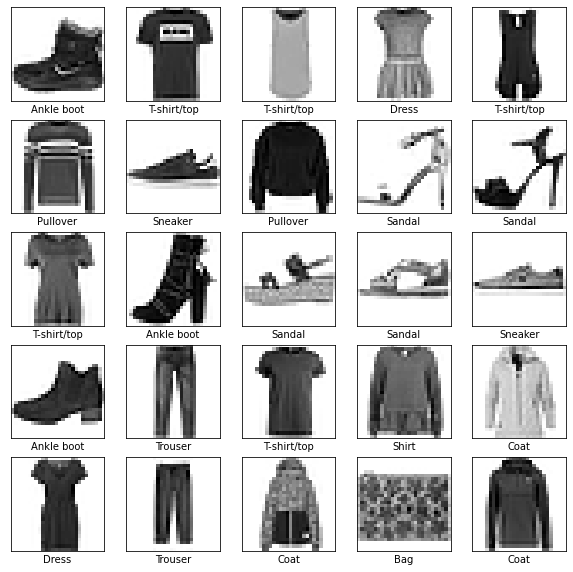

In [72]:
#plotting the firsy 25 preprocessed data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid()
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    #plt.imshow(train_data[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [192]:
#build the model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10))

#compile model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
#train model
model.fit(train_data, train_labels, epochs=10)


'''
Alternative way to build model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

'''


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4958 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3755 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3369 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3110 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2937 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2807 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2675 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2566 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2482 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.23

"\nAlternative way to build model \nmodel = tf.keras.Sequential([\n    tf.keras.layers.Flatten(input_shape=(28, 28)),\n    tf.keras.layers.Dense(128, activation='relu'),\n    tf.keras.layers.Dense(10)\n])\n\n"

In [193]:
#validate mode
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)



313/313 - 1s - loss: 0.3375 - accuracy: 0.8808 - 544ms/epoch - 2ms/step

Test accuracy: 0.8808000087738037


In [194]:
#build  prediction model
probability_model = Sequential([model,tf.keras.layers.Softmax()])
prediction= probability_model.predict(test_data)


print(np.argmax(prediction[0]))
print(test_labels[0])
print(class_names[np.argmax(prediction[0])])


9
9
Ankle boot


In [156]:
def plot_prediction(index):
  plt.figure(figsize=(6,3))

  plt.subplot(1,2,1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(test_data[index], cmap=plt.cm.binary)
  pred_label = np.argmax(prediction[index])
  if pred_label == test_labels[index]:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label],
                                100*np.max(prediction),
                                class_names[test_labels[index]]),
                                color=color)
  
#Bar plot

  plt.subplot(1,2,2)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), prediction[index], color="#777777")
  plt.ylim([0, 1])
  thisplot[pred_label].set_color('red')
  thisplot[test_labels[index]].set_color('blue')
  plt.show()
  





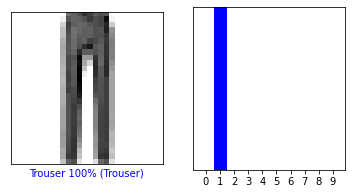

In [195]:
#plot the predcition blue for correct red for wrong
plot_prediction(24)
